<a href="https://colab.research.google.com/github/shreyaghotankar/CMPE-255-Data-Mining/blob/master/CMPE255_DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demonstrate various dimensionality reduction techniques

Write a colab to demonstrate various dimensionality reduction techniques discussed in the class using 

a) any image data set (i gave examples of faces and digits data sets colabs in slides in links / notes)

b) any tabular data set (i gave example of iris data set in slides with colab links)

You need to showcase: 
i) PCA
ii) SVD
iii) LLE
iv) t-SNE
v) ISOMAP
vi) UMAP

In [54]:
# importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn import metrics

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding

import warnings
warnings.filterwarnings("ignore")

!pip install umap-learn
!pip install umap-learn[plot]

import umap

from sklearn.model_selection import train_test_split
from matplotlib import offsetbox
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

## Tabular Dataset

**Dataset** - [Hotel Bookings](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

In [61]:
df_hotel = pd.read_csv('/content/drive/MyDrive/CMPE255 - Data Mining/Assignments/hotel_bookings.csv')

In [62]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Data cleaning 
(reference - assignment 1)

In [63]:
df_hotel.shape

(119390, 32)

In [64]:
df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [65]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [66]:
# finding any data is missing or NaN
df_hotel.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [67]:
# Dropping the columns with maximum null values
df_hotel.drop('company',axis=1,inplace=True)

df_hotel.drop('agent',axis=1,inplace=True)

In [68]:
df_hotel.isna().sum().sort_values(ascending=False)

country                           488
children                            4
reservation_status_date             0
reservation_status                  0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
babies                              0
meal                                0
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr         

In [69]:
# Imputing values in children and country columns

df_hotel['children'].fillna(value=round(df_hotel.children.mean()), inplace= True)

df_hotel['country'].fillna(df_hotel.country.mode().to_string(), inplace=True)

In [70]:
df_hotel.isna().sum().sort_values(ascending=False)

reservation_status_date           0
reservation_status                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [71]:
# Duplicate Rows
print('Number of Duplicate rows = ', (df_hotel.duplicated()).sum())

Number of Duplicate rows =  32020


In [72]:
# dropping all duplicate data
df_hotel.drop_duplicates(keep=False,inplace=True)

(df_hotel.duplicated()).sum()

0

In [73]:
df_hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [74]:
# changing children column from float to int
df_hotel['children'] = df_hotel['children'].astype(int)

In [75]:
df_hotel['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [76]:
df_hotel['arrival_date_month'] = pd.to_datetime(df_hotel.arrival_date_month, format='%B').dt.month

In [77]:
df_hotel.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,7,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,7,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,7,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,7,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,7,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23
11,Resort Hotel,0,35,2015,7,27,1,0,4,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,145.0,0,0,Check-Out,2015-07-05


In [78]:
df_hotel.shape

(79182, 30)

EDA of hotel booking dataset

In [79]:
df_sample = df_hotel.sample(1000)

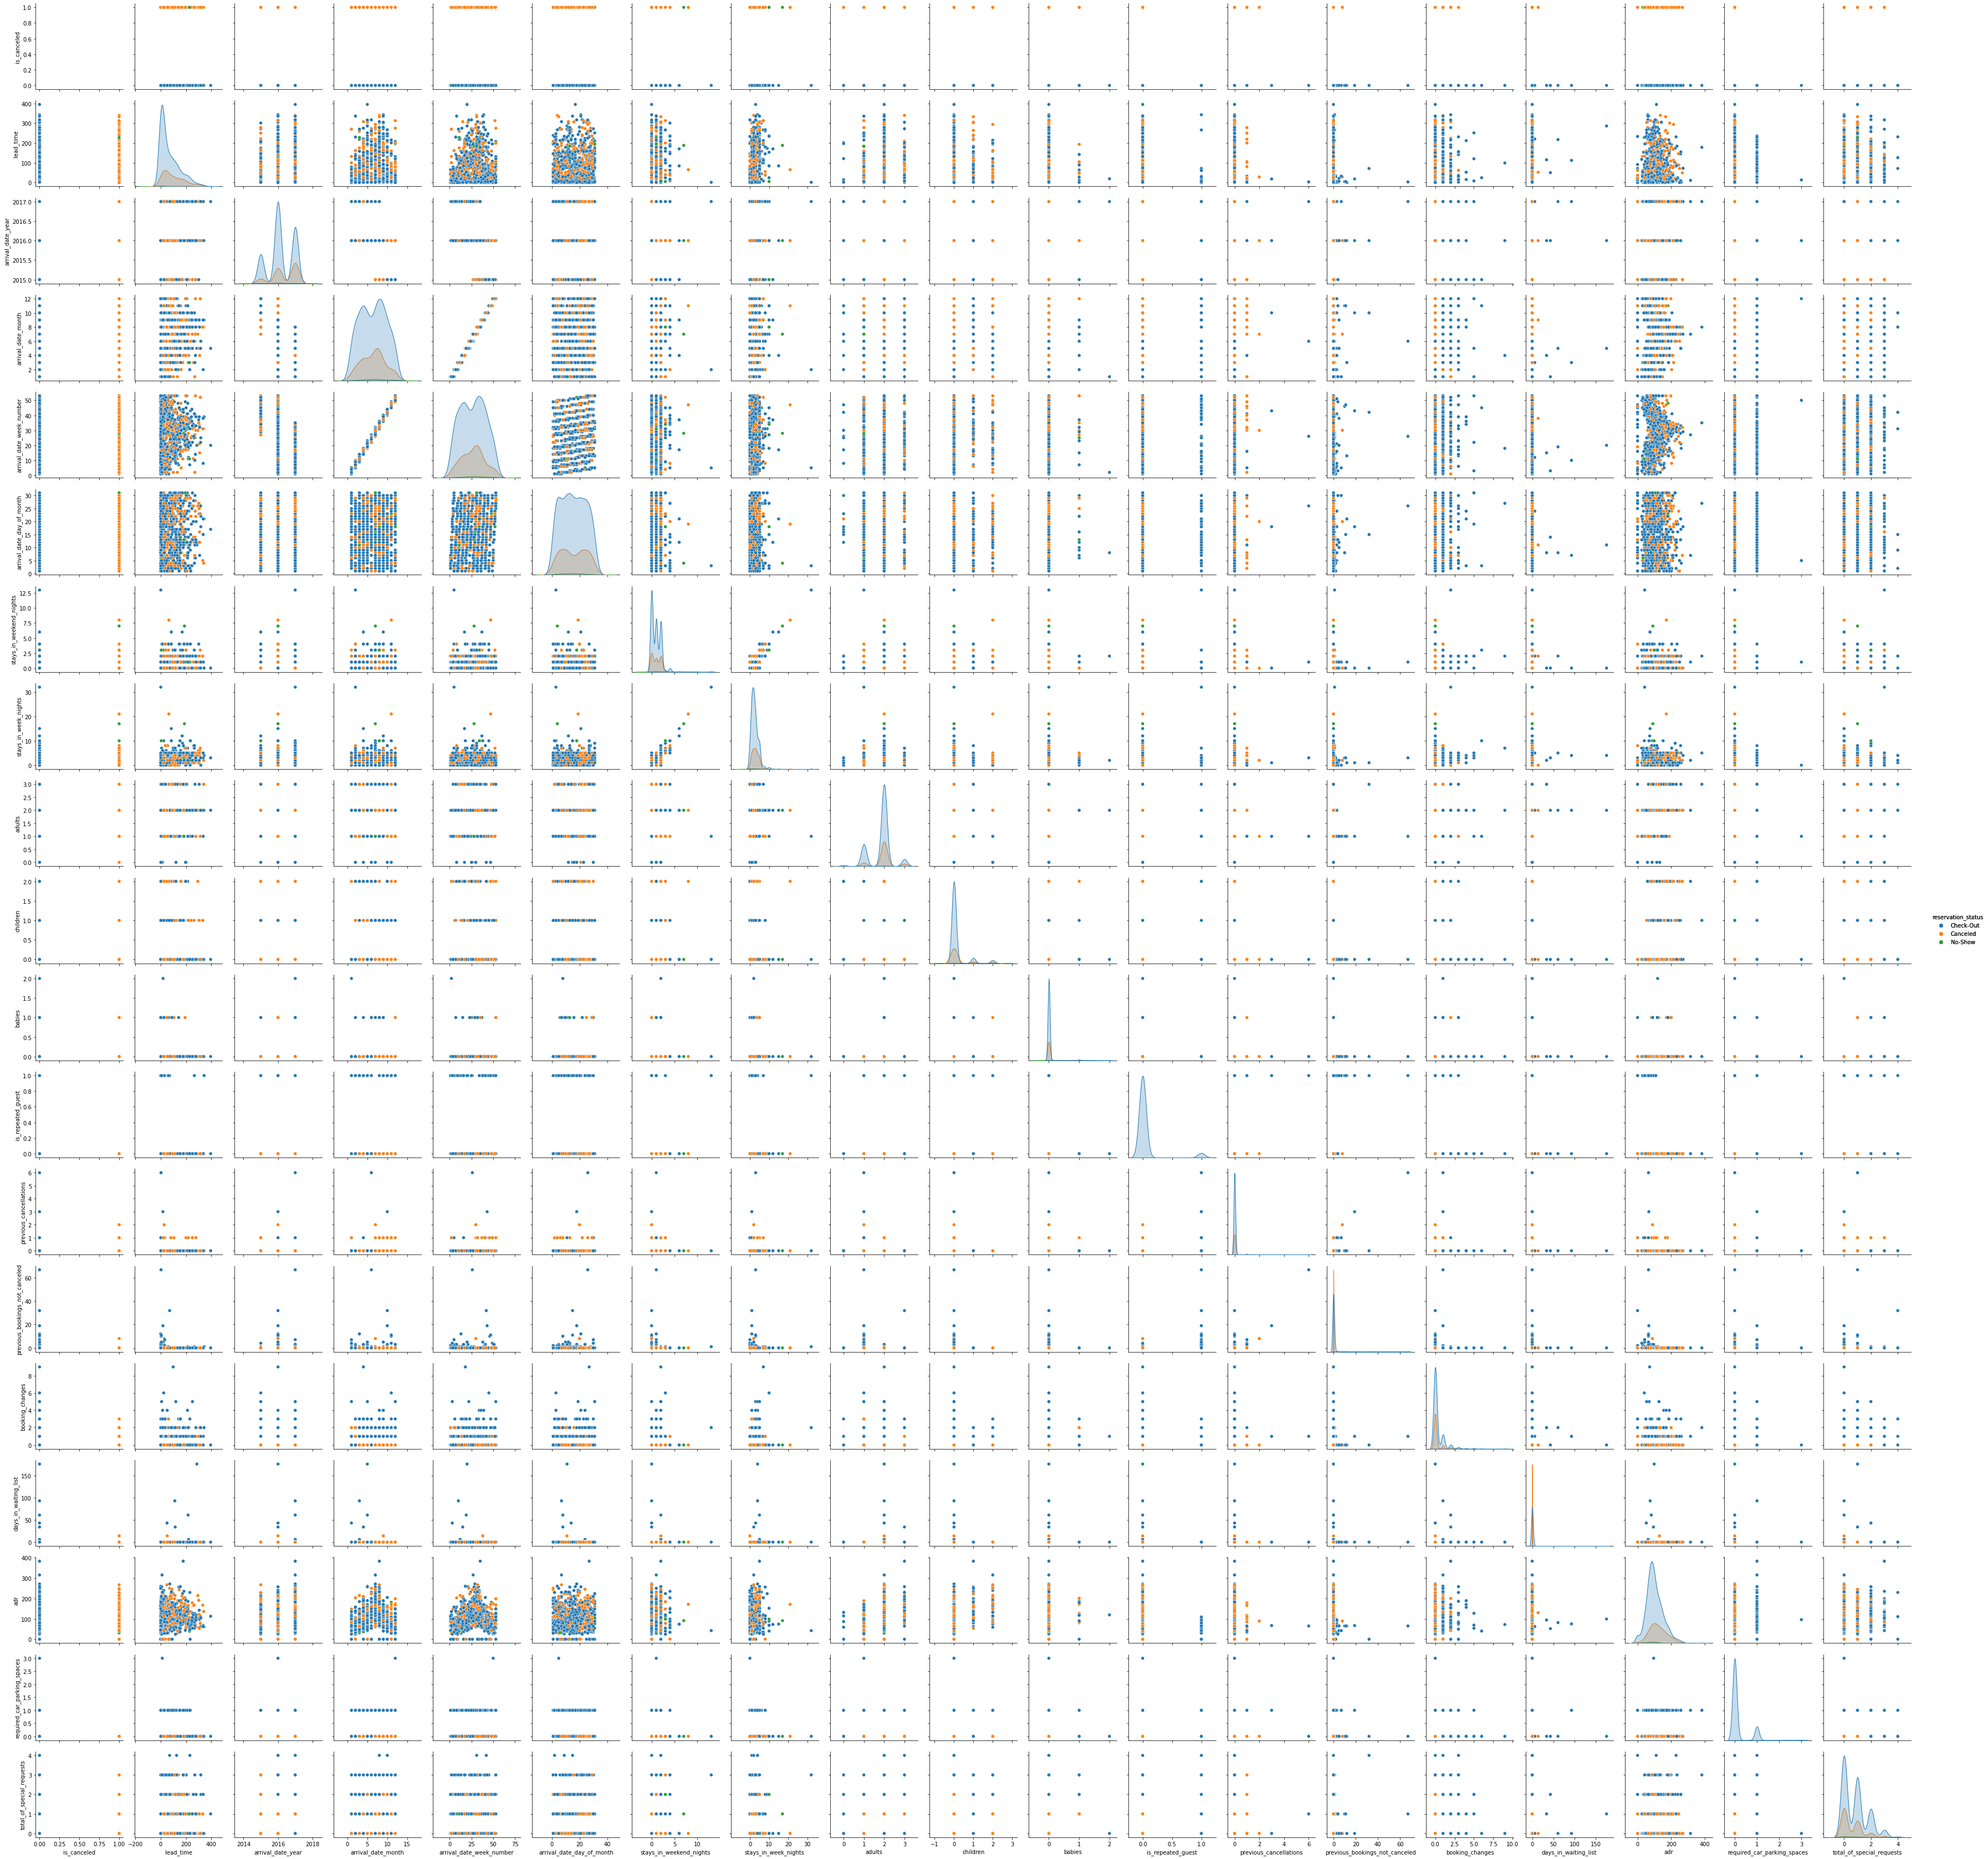

In [ ]:
sns.pairplot(df_sample, hue='reservation_status').add_legend()
plt.show()

### Normalizing the dataset

In [80]:
df = df_hotel.copy()

In [81]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [82]:
# unix timestamp conversion
dates = pd.to_datetime(df['reservation_status_date'])
df['reservation_status_date'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [83]:
# Finding object data types to apply label encoder
categorical_columns = df.select_dtypes(include='object').columns.tolist()
print('Columns with object dtypes: \n', categorical_columns)

Columns with object dtypes: 
 ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


In [84]:
# applying label encoder
le = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

In [85]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,7,27,1,0,0,2,0,0,0,134,3,1,0,0,0,2,2,3,0,0,2,0.0,0,0,1,1435708800
1,1,0,737,2015,7,27,1,0,0,2,0,0,0,134,3,1,0,0,0,2,2,4,0,0,2,0.0,0,0,1,1435708800
2,1,0,7,2015,7,27,1,0,1,1,0,0,0,60,3,1,0,0,0,0,2,0,0,0,2,75.0,0,0,1,1435795200
3,1,0,13,2015,7,27,1,0,1,1,0,0,0,60,2,0,0,0,0,0,0,0,0,0,2,75.0,0,0,1,1435795200
6,1,0,0,2015,7,27,1,0,2,2,0,0,0,134,3,1,0,0,0,2,2,0,0,0,2,107.0,0,0,1,1435881600


In [86]:
X = df.drop(columns = ['reservation_status'])
y = df['reservation_status'].copy()

### PCA

In [87]:
# Standardizing the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [ ]:
# Get the Covariance matrix
covaraince_matrix = np.cov(X_sc.T)

covaraince_matrix

array([[ 1.00001263e+00, -6.79271718e-02,  5.21879920e-02,
        -9.16262191e-02,  2.56631967e-02,  2.62104802e-02,
         9.86644692e-03,  1.58193505e-01,  2.09062574e-01,
        -4.65219978e-03,  1.41804861e-02,  3.72953712e-02,
        -9.58996403e-02,  1.32749805e-01, -1.33532836e-01,
        -1.19605274e-01,  4.50985191e-02, -2.28391339e-02,
        -7.69200286e-03,  2.01255127e-01,  2.61553538e-01,
         3.90528358e-02,  1.29248501e-02, -2.44385193e-02,
        -3.30292976e-02, -1.04981490e-01,  2.19624488e-01,
        -2.76787731e-02, -9.01265027e-02],
       [-6.79271718e-02,  1.00001263e+00,  1.69682446e-01,
         9.65874150e-02,  1.65477522e-03, -6.10012890e-04,
         4.33574347e-03,  6.71263314e-02,  9.21418219e-02,
         8.52416653e-02,  7.71476751e-02, -1.96158909e-02,
         4.98480942e-02,  7.58217598e-02,  1.94422317e-01,
         1.49289200e-01, -9.29737409e-02,  3.05736058e-02,
        -5.29761243e-02,  6.11302724e-02, -4.78764985e-02,
        -8.66

In [ ]:
# Finding Eigen values and Eigen Vectors
eigen_values, eigen_vectors = np.linalg.eig(covaraince_matrix)
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]

print('Eigenvalues:')
for i in eigen_pairs:
  print(i[0])

Eigenvalues:
3.125212517143361
2.692992549641209
2.408133511915407
1.7415429017553437
1.6221567987518624
1.495482762331707
0.00041304670296012303
0.008969854294264045
0.10104441309118474
0.17507909218809753
1.3424677052777607
0.4112645443593791
0.4530708911242549
0.49043110777231785
1.1662898828070667
0.5795460736681333
0.641536018269884
0.6530235042614563
0.6801055502837622
1.072048215331473
0.7618075388231303
0.8018857459849591
1.0368675334801656
0.8436685045564365
0.9753520500644532
0.9926370043321444
0.886581775274385
0.9123382087009881
0.9284169472914903


In [ ]:
pca = PCA()

In [ ]:
# Implementing PCA on overall data to determine the components that have max variance
X_pca = pca.fit_transform(X_sc)

explained_variance = pca.explained_variance_ratio_

#### PCA Visualization

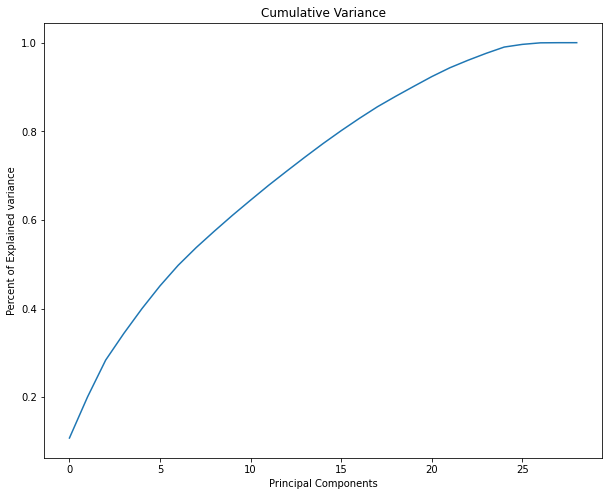

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set(xlabel="Principal Components", ylabel="Percent of Explained variance", title="Cumulative Variance")
plt.show()

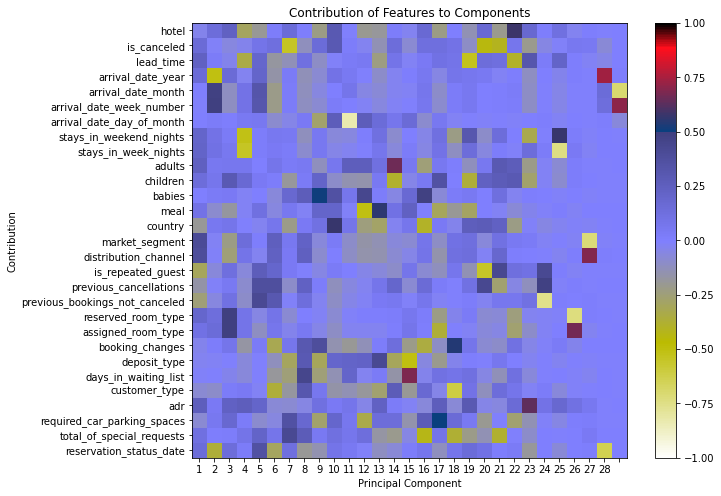

In [ ]:
# Plotting correlation between the principal components
fig, ax = plt.subplots(figsize=(10, 8))
plt.imshow(pca.components_.T, cmap="gist_stern_r", vmin=-1, vmax=1)
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(29), range(1, 29))
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

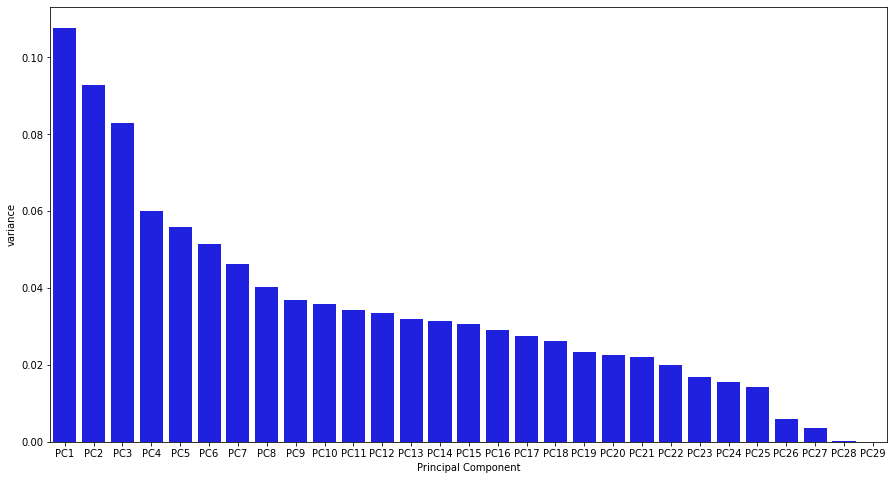

In [ ]:
dataframe = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7',
                                    'PC8','PC9','PC10', 'PC11', 'PC12', 'PC13','PC14',
                                    'PC15','PC16', 'PC17', 'PC18', 'PC19','PC20','PC21',
                                    'PC22', 'PC23', 'PC24', 'PC25','PC26','PC27','PC28', 'PC29']})

plt.figure(figsize=(15,8))
ax = sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="b", )

#### PCA with 2 components

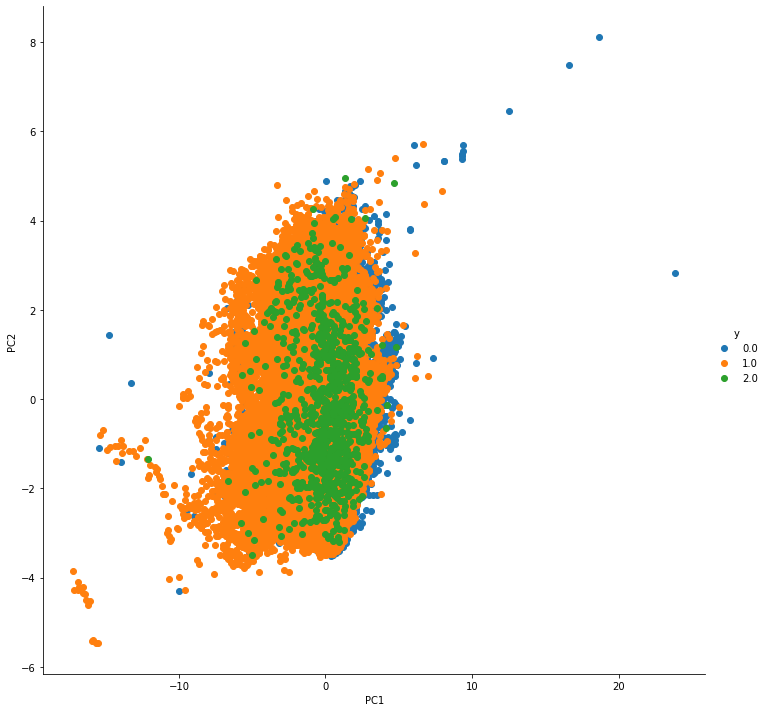

In [ ]:
# working with 2 components
pca = PCA(n_components=2)
pca_h = pca.fit_transform(X_sc)
pca_h = pca_h.T
pca_h = np.vstack((pca_h, y)).T
pca_df = pd.DataFrame(data=pca_h, columns=('PC1', 'PC2', 'y'))
sns.FacetGrid(pca_df, hue='y', height=10).map(plt.scatter, 'PC1', 'PC2').add_legend()

# y has reservation_status labels.

PCA with 2 components have too much overlap and less distinguishable.

### t-SNE

The dataset after cleaning has around 80,000 rows. t-SNE takes a long time to run so using a sample of 10000 for the assignment.

In [88]:
tsne_df = df.sample(10000)

In [89]:
tsne_df.shape

(10000, 30)

In [90]:
X_tsne = tsne_df.drop(columns = ['reservation_status'])
y_tsne = tsne_df['reservation_status'].copy()

In [91]:
sc = StandardScaler()
X_tsne_sc = sc.fit_transform(X_tsne)

In [ ]:
ts = TSNE(n_components=2)
tsne_data = ts.fit_transform(X_tsne_sc)

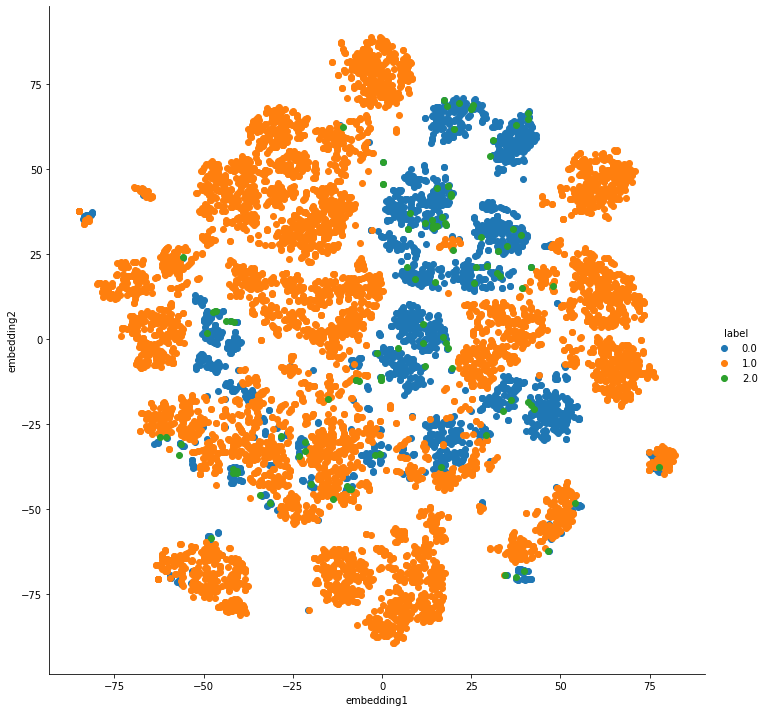

In [ ]:
tsne_data = np.vstack((tsne_data.T, y_tsne)).T
df_tsne = pd.DataFrame(data= tsne_data, columns=('embedding1', 'embedding2', 'label'))

sns.FacetGrid(df_tsne, hue='label', height=10).map(plt.scatter, 'embedding1', 'embedding2').add_legend()

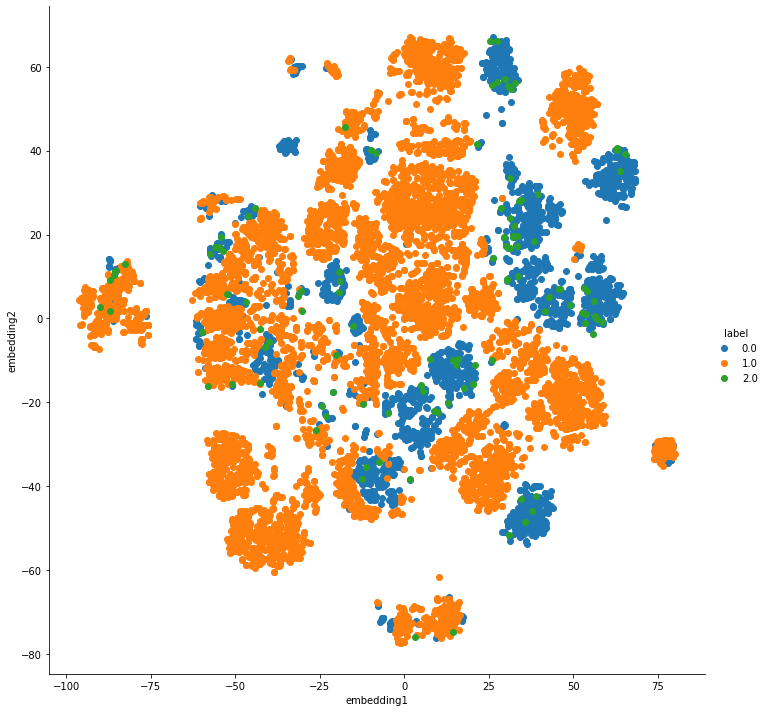

In [ ]:
# we can also add parameters for tsne model
ts = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=1000)
tsne_data1 = ts.fit_transform(X_tsne_sc)

tsne_data1 = np.vstack((tsne_data1.T, y_tsne)).T
df_tsne1 = pd.DataFrame(data= tsne_data1, columns=('embedding1', 'embedding2', 'label'))

sns.FacetGrid(df_tsne1, hue='label', height=10).map(plt.scatter, 'embedding1', 'embedding2').add_legend()

TSNE is better performing than the rest of the methods

### SVD

In [ ]:
svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=0)

X_svd = svd.fit_transform(X_tsne_sc)

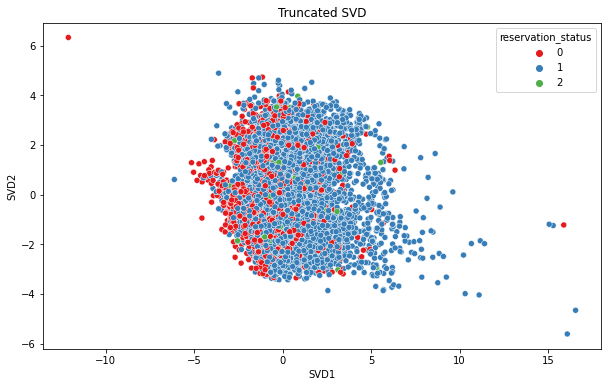

In [ ]:
fig= plt.subplots(figsize=(10 ,6))
ax = sns.scatterplot(X_svd[:,0], X_svd[:,1], hue=y_tsne, palette='Set1')
ax.set_title("Truncated SVD")
ax.set_xlabel("SVD1")
ax.set_ylabel("SVD2")
plt.show()

Components have high correlation. Reservation status labels are overlapping

### LLE

In [ ]:
# LLE with standard method
model = LocallyLinearEmbedding(n_neighbors=5, n_components=2, method='standard', eigen_solver='auto')

X_lle = model.fit_transform(X_tsne_sc)

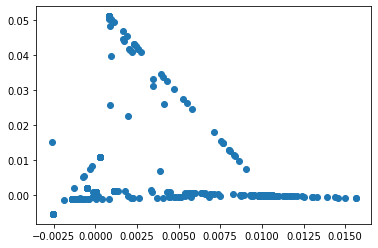

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_lle[:,0], X_lle[:,1], cmap='rainbow')

There is some distortion in the above plot, a lot of it is linear.

### Isomap

In [ ]:
ism = Isomap(n_components=2)
X_ism = ism.fit_transform(X_tsne_sc)
X_ism.shape

(10000, 2)

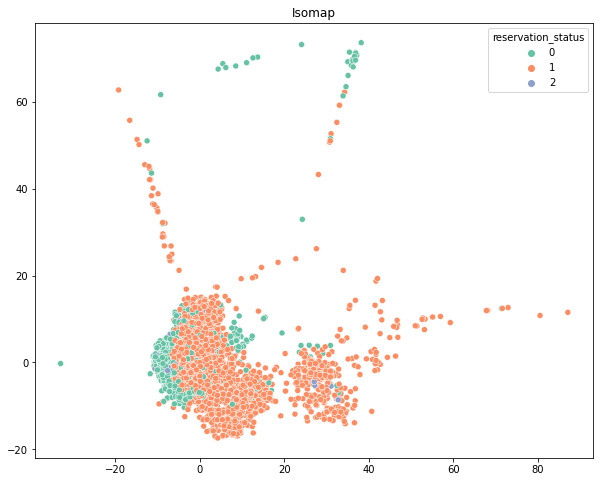

In [ ]:
fig= plt.subplots(figsize=(10 ,8))
ax = sns.scatterplot(X_ism[:,0], X_ism[:,1], hue=y_tsne, palette='Set2')
ax.set_title('Isomap')
plt.show()

From the above plot we can observe that the status labels are not identifiable, are overlapping. Components are highly correlated.

### UMAP

In [92]:
um = umap.UMAP(random_state= 42)
X_um = um.fit_transform(X_tsne_sc)

In [93]:
X_um.shape

(10000, 2)

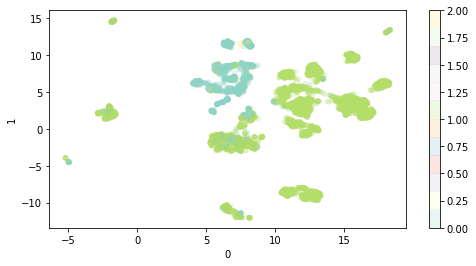

In [94]:
fig, ax = plt.subplots(figsize=(8, 4))
pd.DataFrame(X_um).plot(kind="scatter", x=0, y=1, ax=ax, c=y_tsne, alpha=0.2, cmap="Set3")

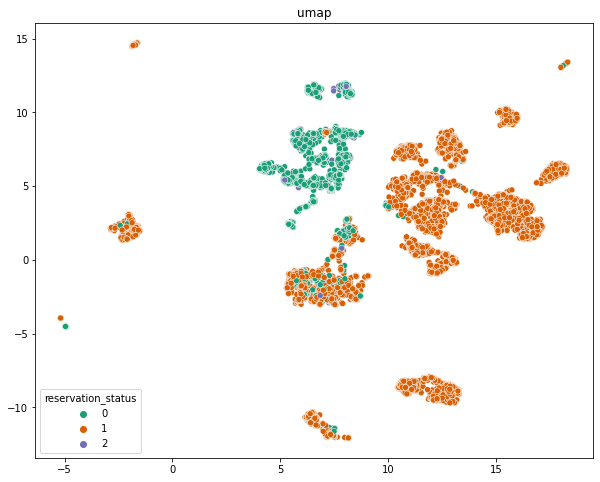

In [102]:
fig= plt.subplots(figsize=(10 ,8))
ax = sns.scatterplot(X_um[:,0], X_um[:,1], hue=y_tsne, palette='Dark2')
ax.set_title('umap')
plt.show()

From this plot we can see that the components are less correlated and we can easily identify the status labels.

## Image Dataset

**Dataset** - [Fashion MNIST](https://www.kaggle.com/zalando-research/fashionmnist/code)

In [2]:
df_image = pd.read_csv('/content/drive/MyDrive/CMPE255 - Data Mining/Assignments/Fashion-MNIST/fashion-mnist_train.csv')
df_image

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df_image.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [4]:
label_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print('Dataset shape: ',df_image.shape)

Dataset shape:  (60000, 785)


In [ ]:
df_image.isna().sum().sort_values(ascending=False)

pixel784    0
pixel268    0
pixel266    0
pixel265    0
pixel264    0
           ..
pixel520    0
pixel519    0
pixel518    0
pixel517    0
label       0
Length: 785, dtype: int64

In [5]:
# Dataset has 60,000 rows and all the methods take a long time to run on large datasets.
# Taking random sample of 10,000 rows.

df_img = df_image.sample(10000)

In [6]:
X = (df_img.drop(columns = ['label'])).to_numpy()
y = (df_img['label'].copy()).to_numpy()

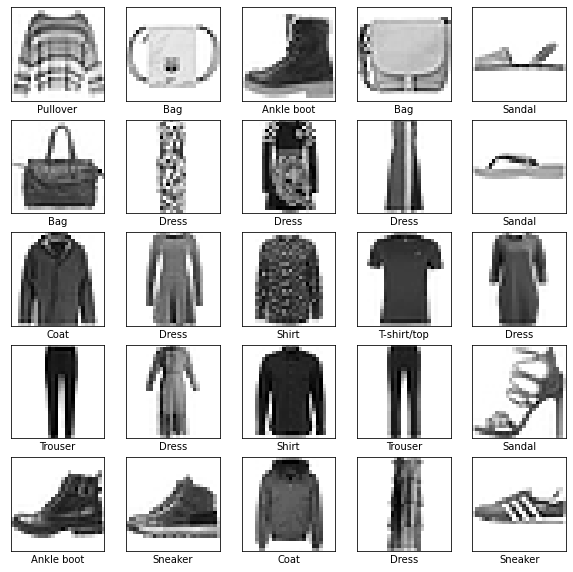

In [ ]:
# Plotting the clothing items
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X[i].reshape(28, 28), cmap="binary")
  plt.xlabel(label_names[y[i]])
plt.show()

In [7]:
# train test split
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size=0.25)

### PCA

In [8]:
# implementing PCA to determine how many conponents hold the maximum variance
pca = PCA()

X_img_pca = pca.fit_transform(X_train)

exp_var = pca.explained_variance_ratio_

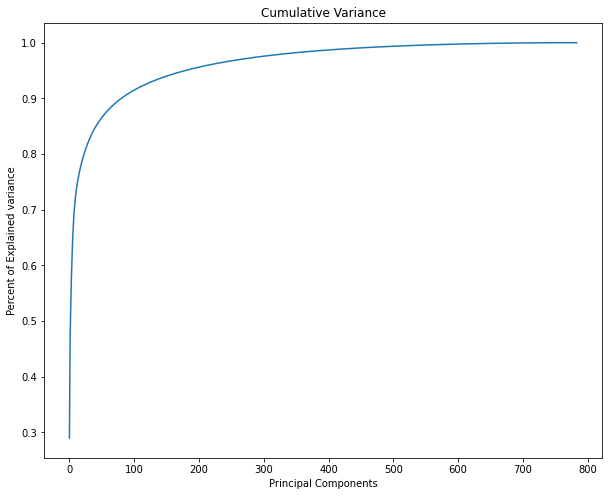

In [9]:
# Plotting Cummulative variance in principal components
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set(xlabel="Principal Components", ylabel="Percent of Explained variance", title="Cumulative Variance")
plt.show()

In [10]:
# implementing PCA with 2 components
pca = PCA(n_components=2)
X_tr_pca = pca.fit_transform(X_train)

Text(0.5, 1.0, '17.60% Explained Variance')

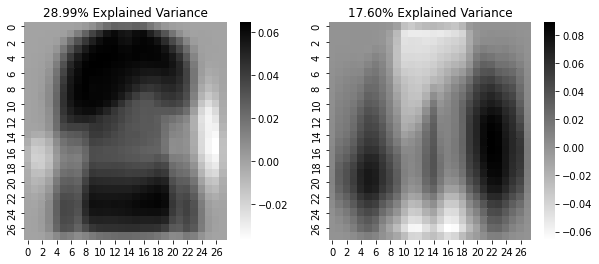

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

sns.heatmap(pca.components_[0,:].reshape(28,28), ax=ax[0], cmap='gray_r')
sns.heatmap(pca.components_[1,:].reshape(28,28), ax=ax[1], cmap='gray_r')

ax[0].set_title("{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100))
ax[1].set_title("{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100))

The left image looks like of a long clothing item and the right image might be pants.

### SVD

In [12]:
svd = TruncatedSVD(n_components=4, algorithm='randomized', random_state=42)

X_tr_svd = svd.fit_transform(X_train)

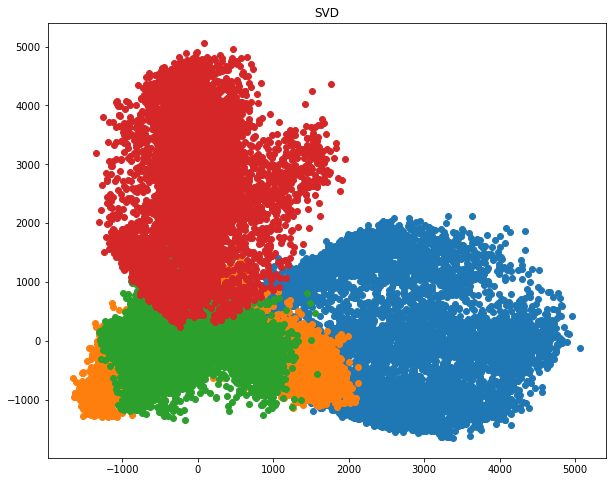

In [ ]:
plt.figure(figsize=(10,8))
plt.title('SVD')
plt.scatter(X_tr_svd[:,0], X_tr_svd[:,1])
plt.scatter(X_tr_svd[:,1], X_tr_svd[:,2])
plt.scatter(X_tr_svd[:,2],X_tr_svd[:,3])
plt.scatter(X_tr_svd[:,3],X_tr_svd[:,0])

The above shows the distribution of 4 classes, 2 classes in that are overlapping which can be made better if we reduce number of components from 4 to 3.

In [21]:
svd1 = TruncatedSVD(n_components=3, algorithm='randomized', random_state=42)

X_tr_svd1 = svd1.fit_transform(X_train)

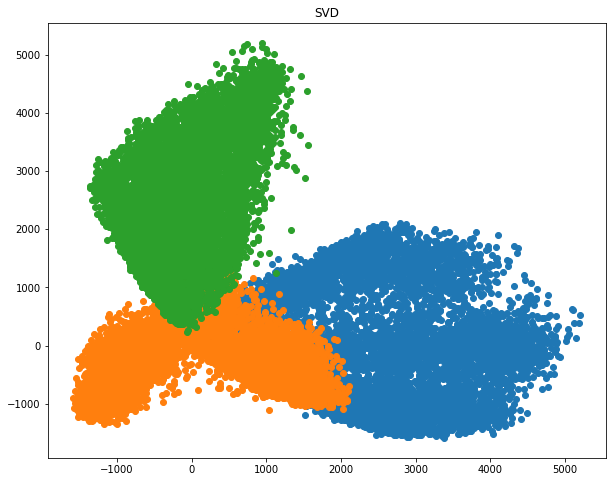

In [22]:
plt.figure(figsize=(10,8))
plt.title('SVD')
plt.scatter(X_tr_svd1[:,0], X_tr_svd1[:,1])
plt.scatter(X_tr_svd1[:,1], X_tr_svd1[:,2])
plt.scatter(X_tr_svd1[:,2],X_tr_svd1[:,0])

The above has 3 classes visualization plot and better than the 4 classes and with 3 the grouping is good.

### LLE

In [23]:
# LLE with standard method
model_lle = LocallyLinearEmbedding(n_neighbors=5, n_components=2, method='standard', eigen_solver='auto')

lle = model_lle.fit_transform(X_train)

In [34]:
lle.shape

(7500, 2)

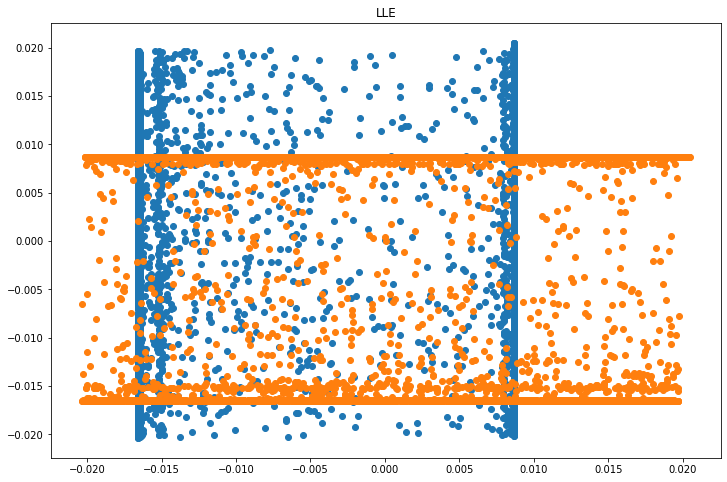

In [57]:
plt.figure(figsize=(12,8))
plt.title('LLE')
plt.scatter(lle[:,0], lle[:,1])
plt.scatter(lle[:,1], lle[:,0])

In [25]:
model_lle1 = LocallyLinearEmbedding(n_neighbors=5, n_components=2, method='modified', eigen_solver='auto')

lle1 = model_lle1.fit_transform(X_train)

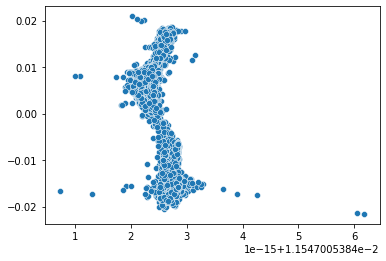

In [28]:
fig, ax = plt.subplots()
sns.scatterplot(lle1[:,0], lle1[:,1], cmap='BuPu')

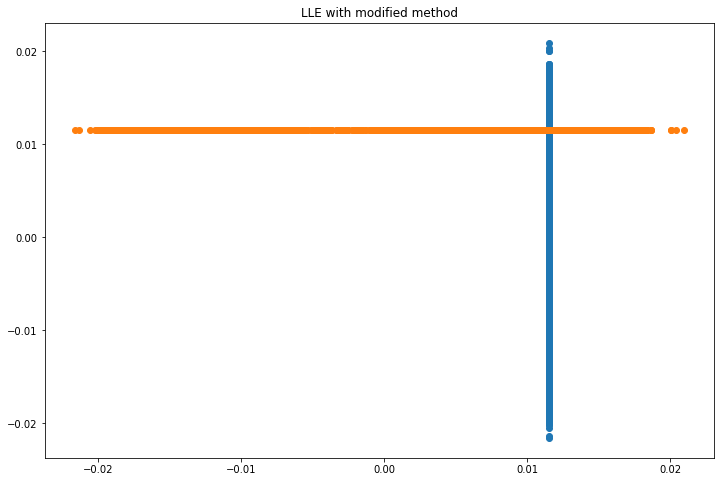

In [58]:
plt.figure(figsize=(12,8))
plt.title('LLE with modified method')
plt.scatter(lle1[:,0], lle1[:,1])
plt.scatter(lle1[:,1], lle1[:,0])

We can observe from the above 2 plots that with 4 components the data is scattered across and with 2 components that data is kind of grouped.

### t-SNE

In [41]:
tsne = TSNE(n_components=3, n_iter=300)
tsne_out = tsne.fit_transform(X_train)

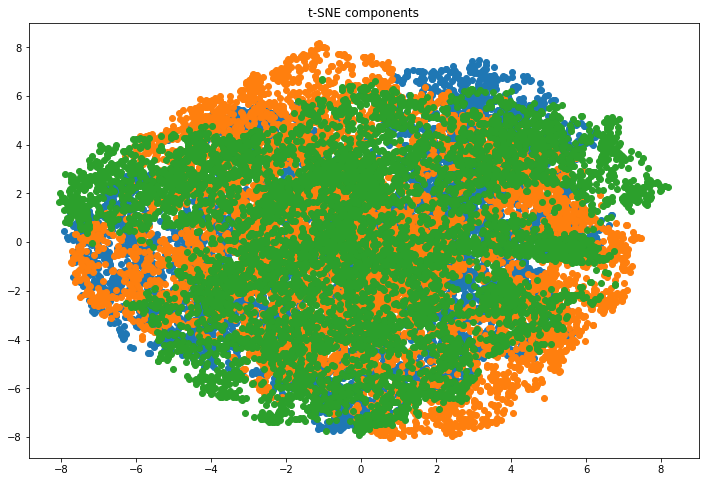

In [43]:
plt.figure(figsize=(12,8))
plt.title('t-SNE components')
plt.scatter(tsne_out[:,0], tsne_out[:,1])
plt.scatter(tsne_out[:,1], tsne_out[:,2])
plt.scatter(tsne_out[:,2], tsne_out[:,0])

The above plot shows the components from t-SNE, high correlation

### UMAP

In [44]:
umap1 = umap.UMAP(n_neighbors=5, random_state= 42, n_components=3)
X_umap = umap1.fit_transform(X_train)

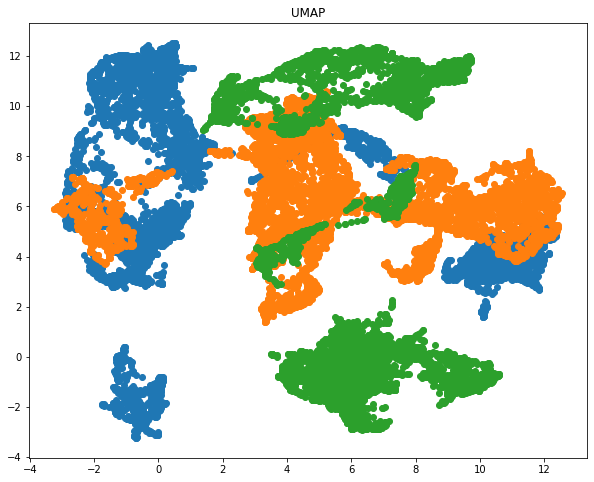

In [45]:
plt.figure(figsize=(10,8))
plt.title('UMAP')
plt.scatter(X_umap[:,0], X_umap[:,1])
plt.scatter(X_umap[:,1], X_umap[:,2])
plt.scatter(X_umap[:,2], X_umap[:,0])

From the above plot we can observe that the embeddings are not coupled tightly - less correlation

### Isomap

In [46]:
ism1 = Isomap(n_components=3)
X_ism1 = ism1.fit_transform(X_train)

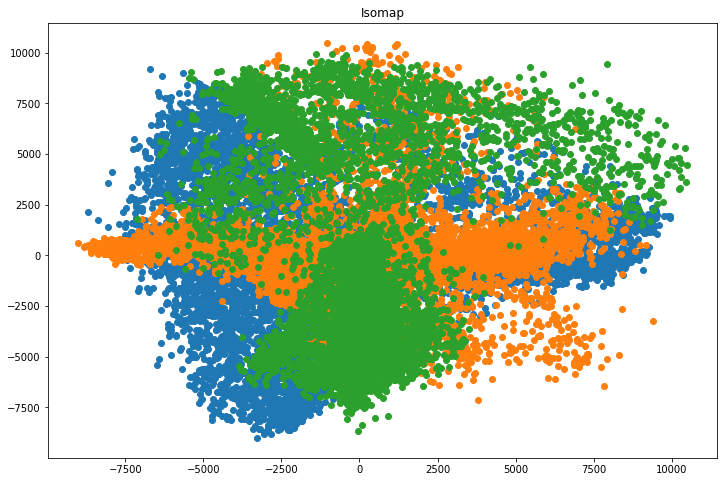

In [56]:
plt.figure(figsize=(12,8))
plt.title('Isomap')
plt.scatter(X_ism1[:,0], X_ism1[:,1])
plt.scatter(X_ism1[:,1], X_ism1[:,2])
plt.scatter(X_ism1[:,2], X_ism1[:,0])

Isomap is also better but not better than umap.

From all the dimensionality methods ran on image dataset, with UMAP we can  determine the components separately than compared to other methods.

# References



1.   https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.10-Manifold-Learning.ipynb#scrollTo=w1KvP_kbFFRx
2.   https://github.com/luisguiserrano/singular_value_decomposition/blob/master/image_compression.ipynb
3.   https://learning.oreilly.com/library/view/machine-learning-pocket/9781492047537/ch17.html
4.    https://www.analyticsvidhya.com/blog/
